In [16]:
import dask.dataframe as dd
import pandas as pd

In [17]:
hunk_size = 1000  # Lire 1000 lignes à la fois
file_path ="/kaggle/input/eeg-dataset/EEG_Scaled_data.csv"  # Remplace par le chemin réel

df_sample = pd.read_csv(file_path, nrows=5)
print("Colonnes du dataset:", df_sample.columns)
print(df_sample.head())

Colonnes du dataset: Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Channel_9', 'Channel_10',
       ...
       'Channel_36856', 'Channel_36857', 'Channel_36858', 'Channel_36859',
       'Channel_36860', 'Channel_36861', 'Channel_36862', 'Channel_36863',
       'Channel_36864', 'target'],
      dtype='object', length=36865)
   Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
0      0.647      0.149     -0.213     -0.199     -0.287     -0.187   
1     -2.450     -2.788     -2.387     -1.370     -1.032     -1.037   
2     -0.026     -0.123     -0.347     -0.348      0.027      0.162   
3     -0.067     -0.153     -0.180     -0.210     -0.238     -0.183   
4     -0.190     -0.299     -0.333     -0.199      0.182      0.261   

   Channel_7  Channel_8  Channel_9  Channel_10  ...  Channel_36856  \
0      0.320      0.445      0.482       0.348  ...          0.076   
1     -1.253     -1.702     -2.116 

In [18]:
# Lire seulement la colonne cible
target_col = "target"  # Remplace par le vrai nom

df_target = pd.read_csv(file_path, usecols=[target_col], chunksize=50000)
count_0, count_1 = 0, 0

for chunk in df_target:
    count_0 += (chunk[target_col] == 0).sum()
    count_1 += (chunk[target_col] == 1).sum()

print(f"Non-crise: {count_0}, Crise: {count_1}")

Non-crise: 9799, Crise: 1434


In [19]:
missing_values = pd.read_csv(file_path, nrows=1000).isnull().sum().sum()
print(f"Nombre total de valeurs manquantes : {missing_values}")

Nombre total de valeurs manquantes : 0


In [20]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time

In [21]:
# Path to your dataset
file_path = "/kaggle/input/eeg-dataset/EEG_Scaled_data.csv"

# Load a sample for visualization (adjust sample size based on your system capabilities)
sample_size = 10000  # Adjust as needed
df_sample = pd.read_csv(file_path, nrows=sample_size)

print(f"Dataset shape: {df_sample.shape}")
print("\nData types:")
print(df_sample.dtypes)

print("\nBasic statistics:")
print(df_sample.describe())

Dataset shape: (10000, 36865)

Data types:
Channel_1        float64
Channel_2        float64
Channel_3        float64
Channel_4        float64
Channel_5        float64
                  ...   
Channel_36861    float64
Channel_36862    float64
Channel_36863    float64
Channel_36864    float64
target             int64
Length: 36865, dtype: object

Basic statistics:
          Channel_1     Channel_2     Channel_3     Channel_4     Channel_5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.000581     -0.001293     -0.000028      0.000252     -0.001321   
std        0.995197      0.992988      0.991841      0.993357      0.992137   
min      -14.591000    -14.564000    -15.325000    -14.391000    -13.434000   
25%       -0.190000     -0.202000     -0.199000     -0.195000     -0.185000   
50%       -0.004000     -0.004000     -0.005000      0.003000      0.012000   
75%        0.186000      0.179000      0.181000      0.186000      0.194000   
ma

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time

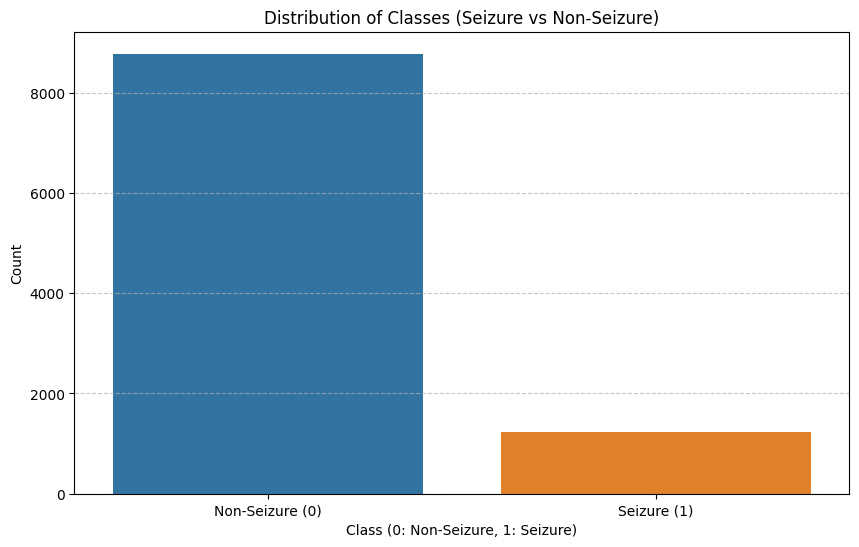

In [23]:
# 1. Class Distribution Visualization
plt.figure(figsize=(10, 6))
class_counts = df_sample['target'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Classes (Seizure vs Non-Seizure)')
plt.xlabel('Class (0: Non-Seizure, 1: Seizure)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Seizure (0)', 'Seizure (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('class_distribution.png')
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


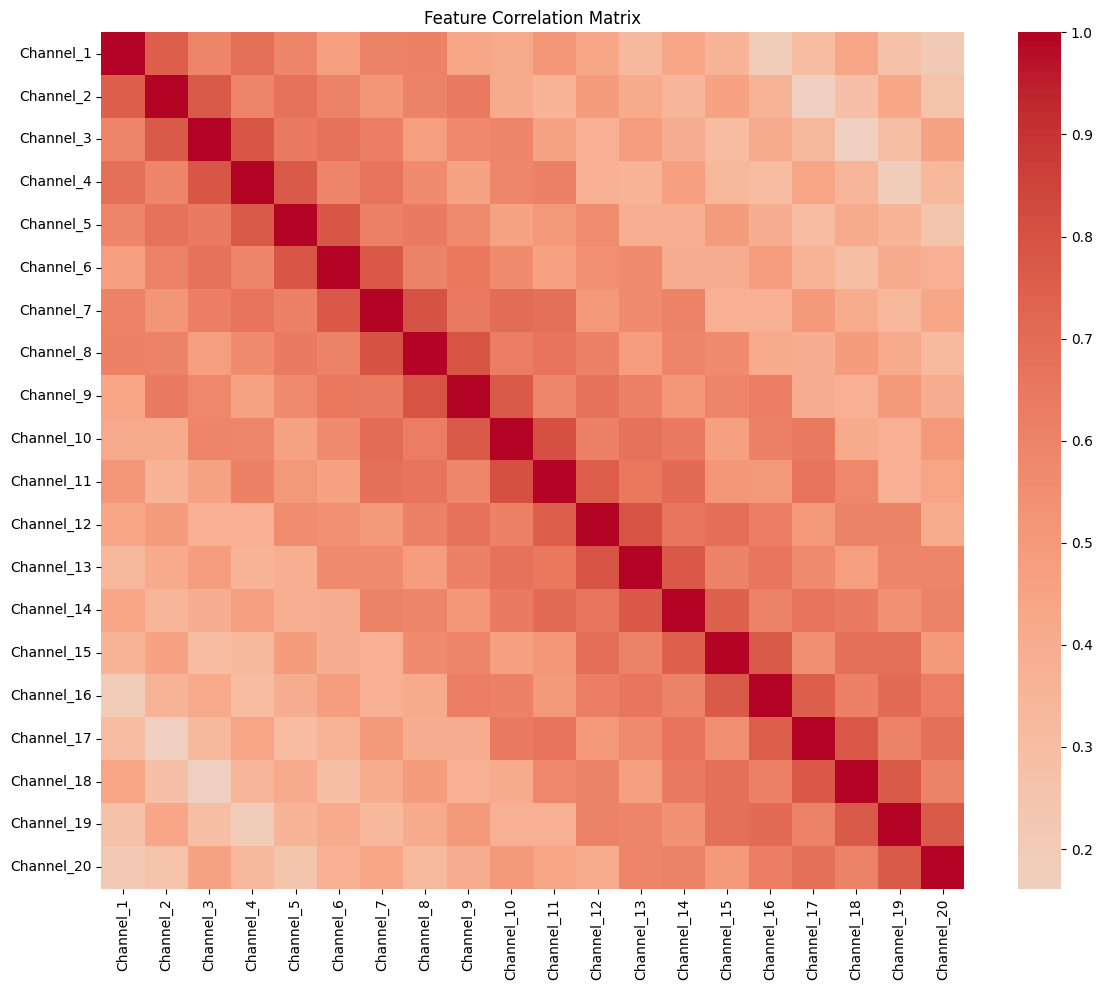

In [24]:
# 2. Feature Correlation Analysis
# Select a subset of features if there are too many
feature_cols = [col for col in df_sample.columns if col != 'target']
if len(feature_cols) > 20:
    # If too many features, select a subset
    feature_cols = feature_cols[:20]

plt.figure(figsize=(12, 10))
correlation = df_sample[feature_cols].corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('feature_correlation.png')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

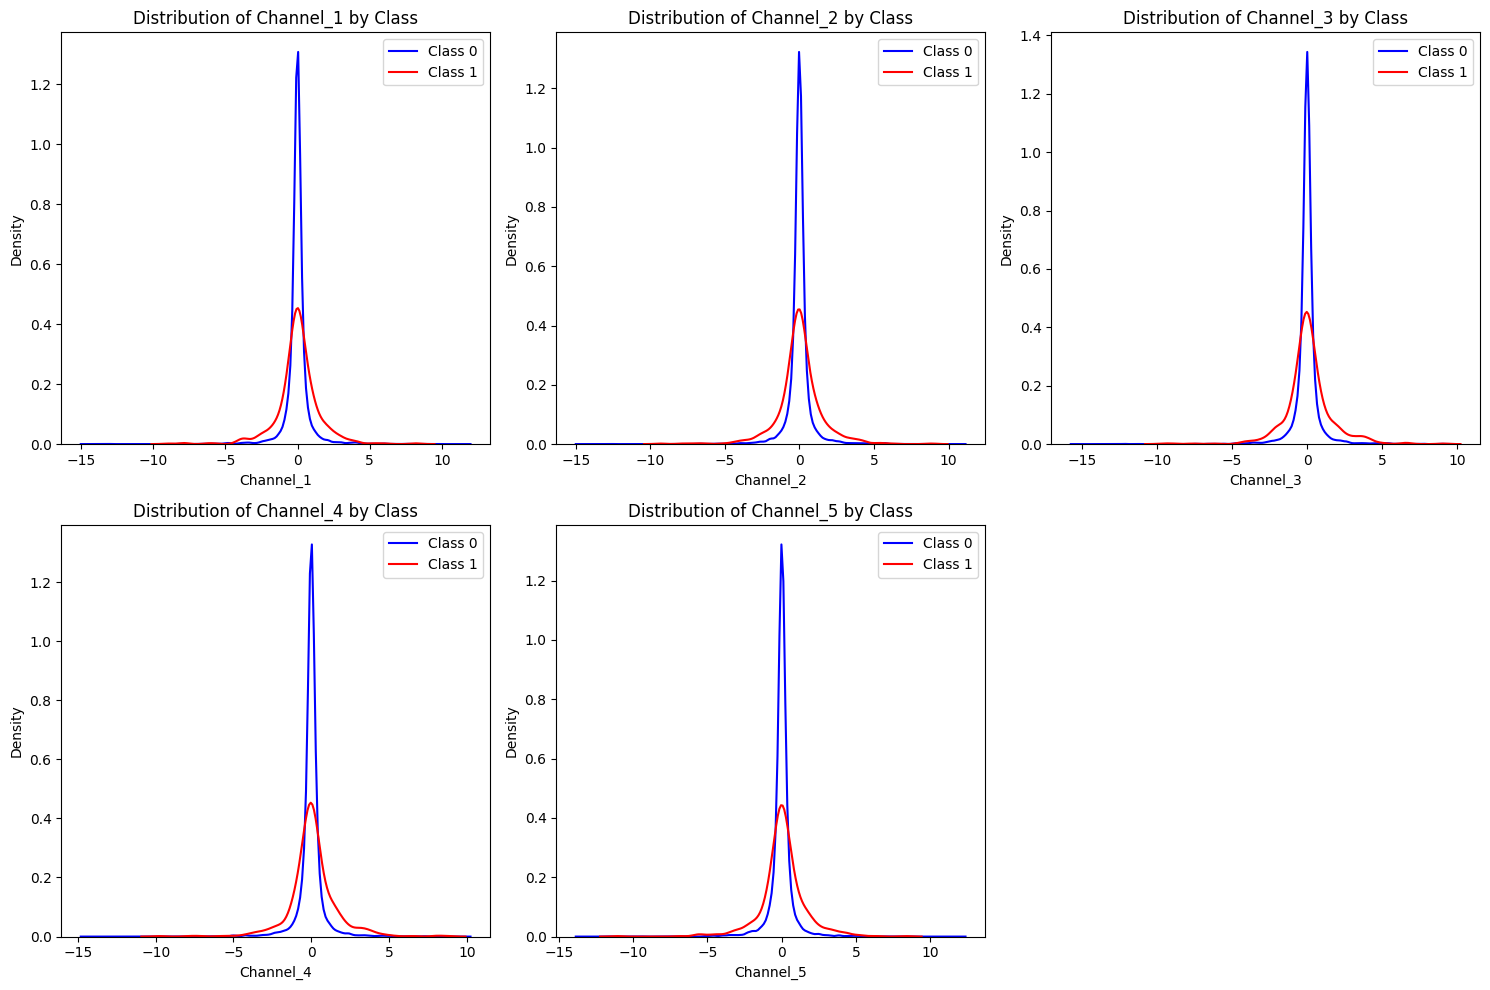

In [25]:
# 3. Distribution of features by class
# Select a few representative features
if len(feature_cols) > 5:
    viz_features = feature_cols[:5]  # First 5 features for visualization
else:
    viz_features = feature_cols

plt.figure(figsize=(15, 10))
for i, feature in enumerate(viz_features):
    plt.subplot(2, 3, i+1)
    for target, color in zip([0, 1], ['blue', 'red']):
        sns.kdeplot(df_sample[df_sample['target'] == target][feature], 
                   color=color, label=f'Class {target}')
    plt.title(f'Distribution of {feature} by Class')
    plt.legend()
plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

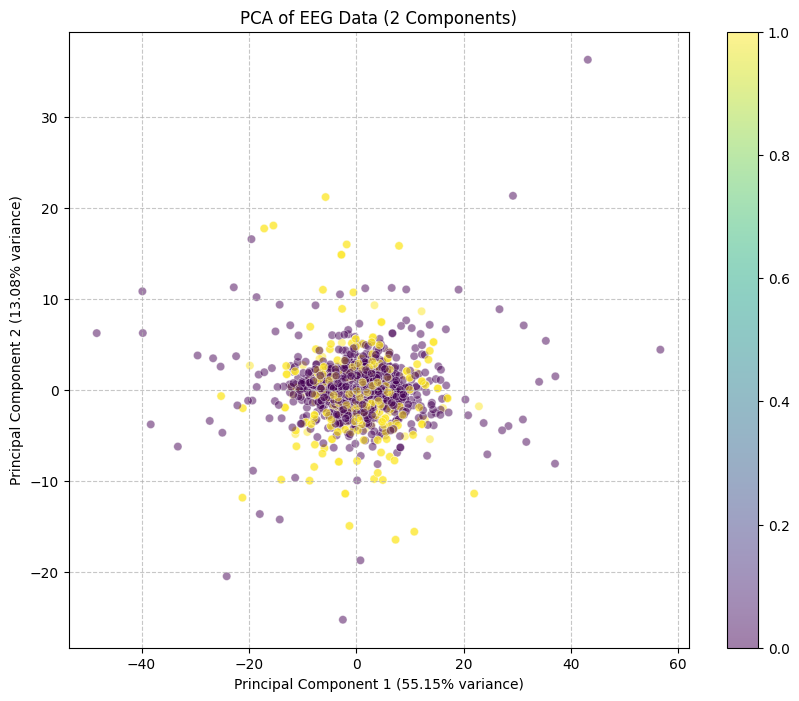

In [26]:
# 4. PCA Visualization
# Apply PCA to reduce dimensionality for visualization
feature_matrix = df_sample[feature_cols].values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_matrix)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_sample['target'], 
            cmap='viridis', alpha=0.5, edgecolors='w', linewidth=0.5)
plt.colorbar(scatter)
plt.title('PCA of EEG Data (2 Components)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('pca_visualization.png')
plt.show()

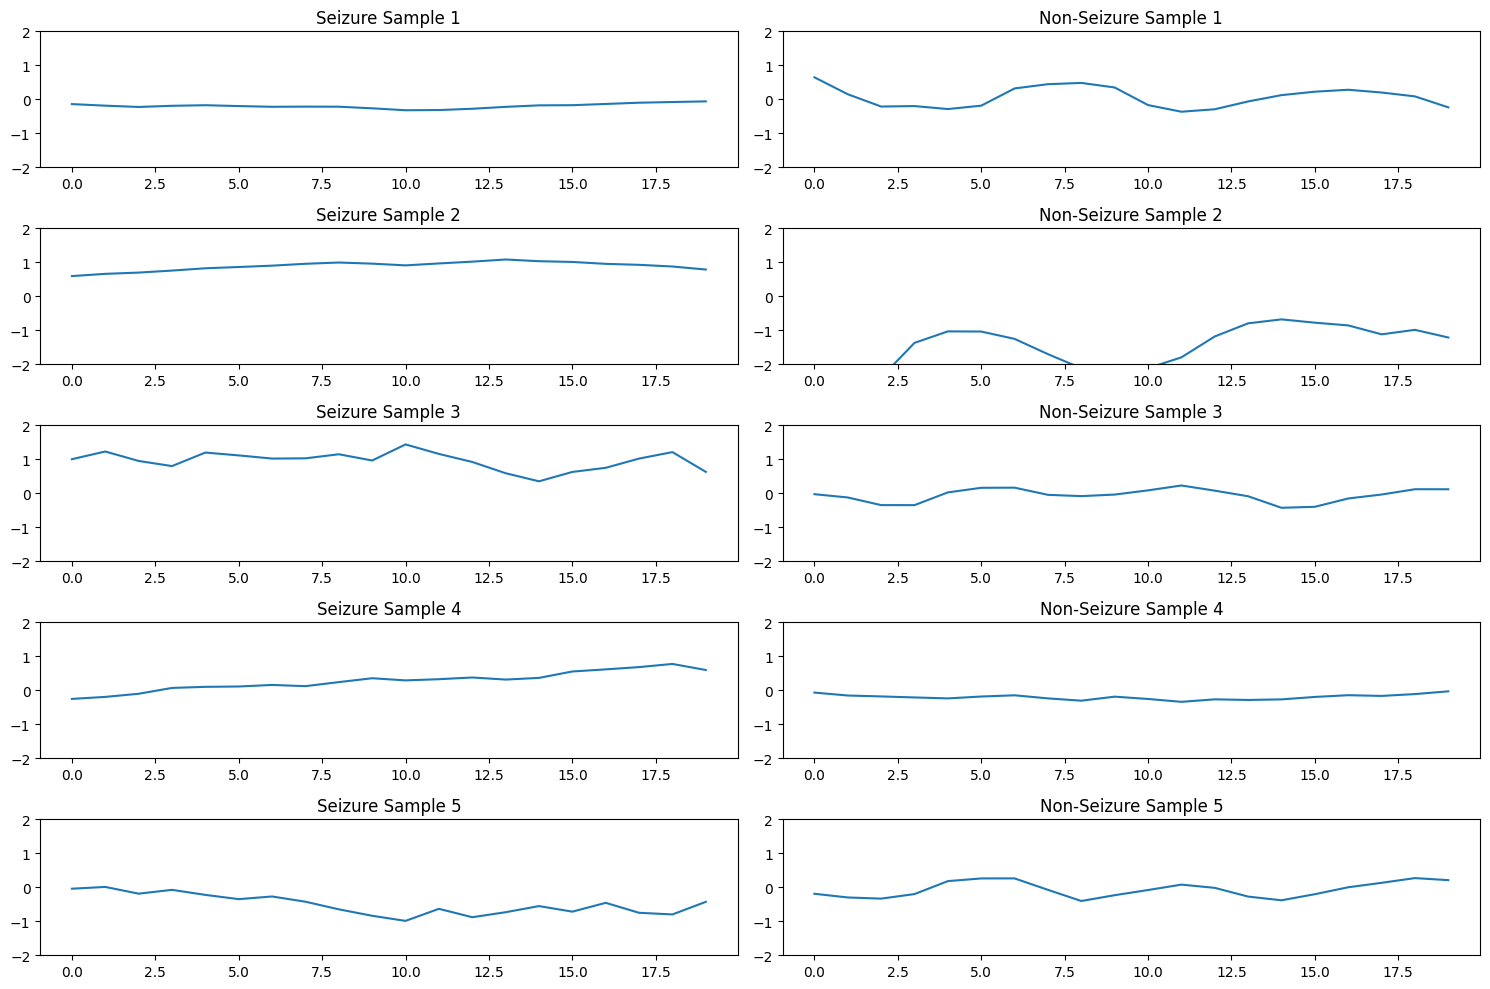

In [27]:
# 5. Time Series Visualization (for a subset of samples)
# Assuming the features represent EEG channels or measurements over time
num_samples_to_plot = 5
seizure_samples = df_sample[df_sample['target'] == 1].iloc[:num_samples_to_plot]
non_seizure_samples = df_sample[df_sample['target'] == 0].iloc[:num_samples_to_plot]

# Plot some seizure samples
plt.figure(figsize=(15, 10))
for i, (idx, row) in enumerate(seizure_samples.iterrows()):
    plt.subplot(num_samples_to_plot, 2, i*2+1)
    plt.plot(row[feature_cols].values)
    plt.title(f'Seizure Sample {i+1}')
    plt.ylim(-2, 2)  # Adjust based on your data range
    
    # Plot a non-seizure sample beside it
    plt.subplot(num_samples_to_plot, 2, i*2+2)
    plt.plot(non_seizure_samples.iloc[i][feature_cols].values)
    plt.title(f'Non-Seizure Sample {i+1}')
    plt.ylim(-2, 2)  # Adjust based on your data range

plt.tight_layout()
plt.savefig('time_series_comparison.png')
plt.show()

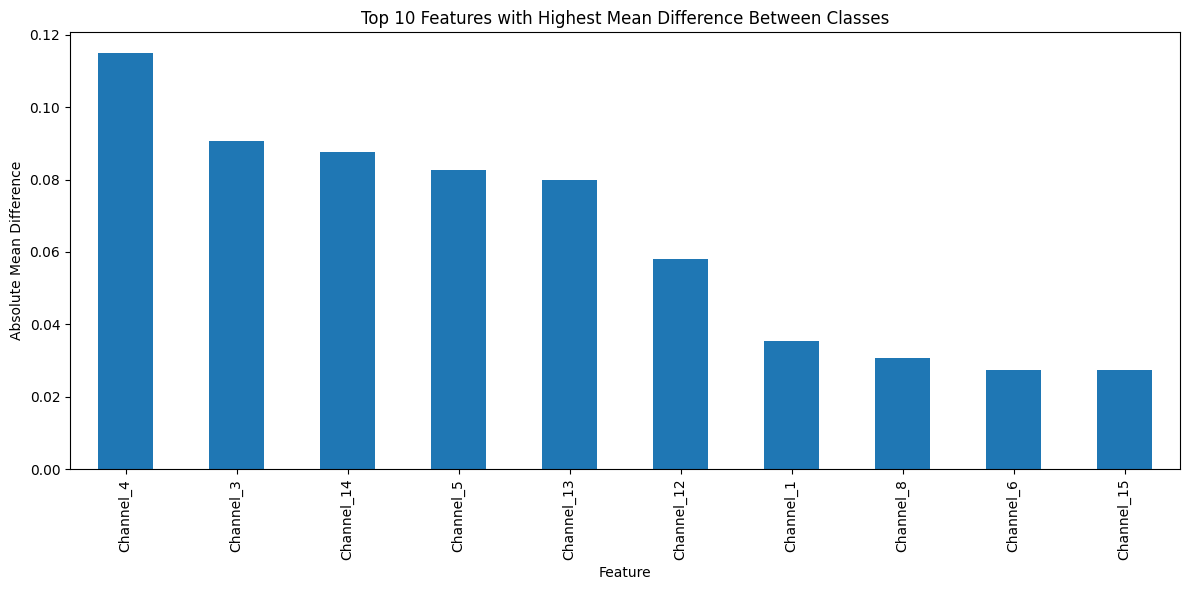

In [28]:
# 6. Class Separability Analysis
# Calculate means for each class
seizure_mean = df_sample[df_sample['target'] == 1][feature_cols].mean()
non_seizure_mean = df_sample[df_sample['target'] == 0][feature_cols].mean()

# Calculate the difference between means
diff = (seizure_mean - non_seizure_mean).abs()
top_diff_features = diff.sort_values(ascending=False)[:10]  # Top 10 most different features

plt.figure(figsize=(12, 6))
top_diff_features.plot(kind='bar')
plt.title('Top 10 Features with Highest Mean Difference Between Classes')
plt.xlabel('Feature')
plt.ylabel('Absolute Mean Difference')
plt.tight_layout()
plt.savefig('class_separability.png')
plt.show()


Calculating feature importances with Random Forest...
Random Forest training time: 1.11 seconds


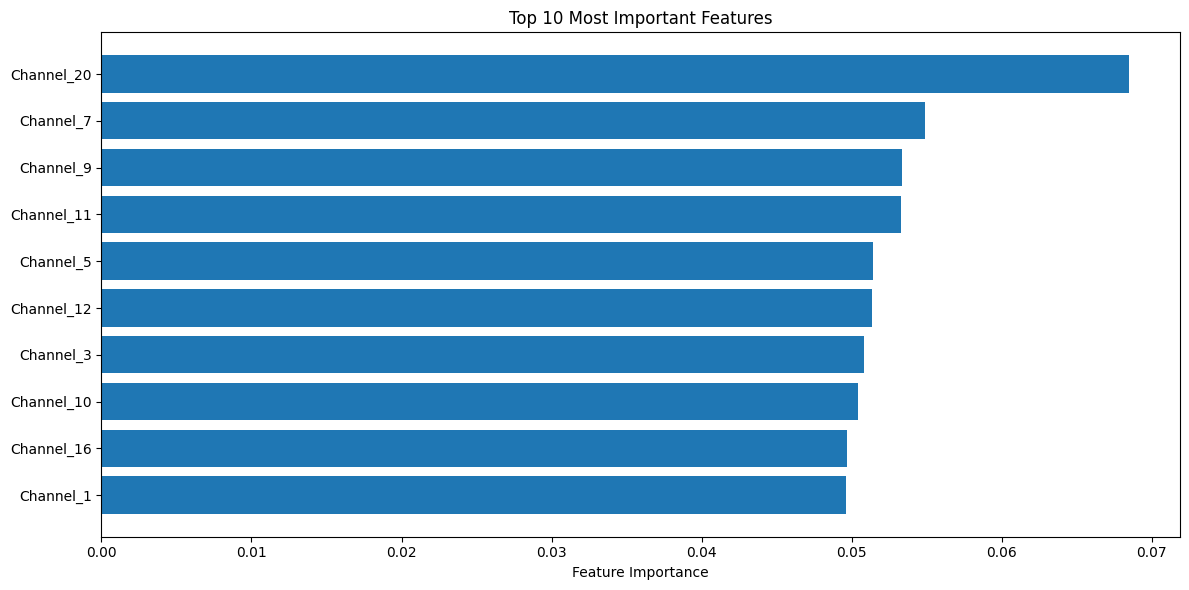


Data visualization complete! Saved all plots.


In [29]:
# 7. Feature Importance Analysis
from sklearn.ensemble import RandomForestClassifier

# Train a simple Random Forest to get feature importances
X = df_sample[feature_cols]
y = df_sample['target']

print("\nCalculating feature importances with Random Forest...")
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)
print(f"Random Forest training time: {time.time() - start_time:.2f} seconds")

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(12, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_cols[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("\nData visualization complete! Saved all plots.")